In [4]:
#Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [5]:
#Load the Iris dataset
iris=load_iris()
X=iris.data
y=iris.target

#create dataframe for visualization
df=pd.DataFrame(X, columns=iris.feature_names)
df['target']=y

#show first few zeros
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

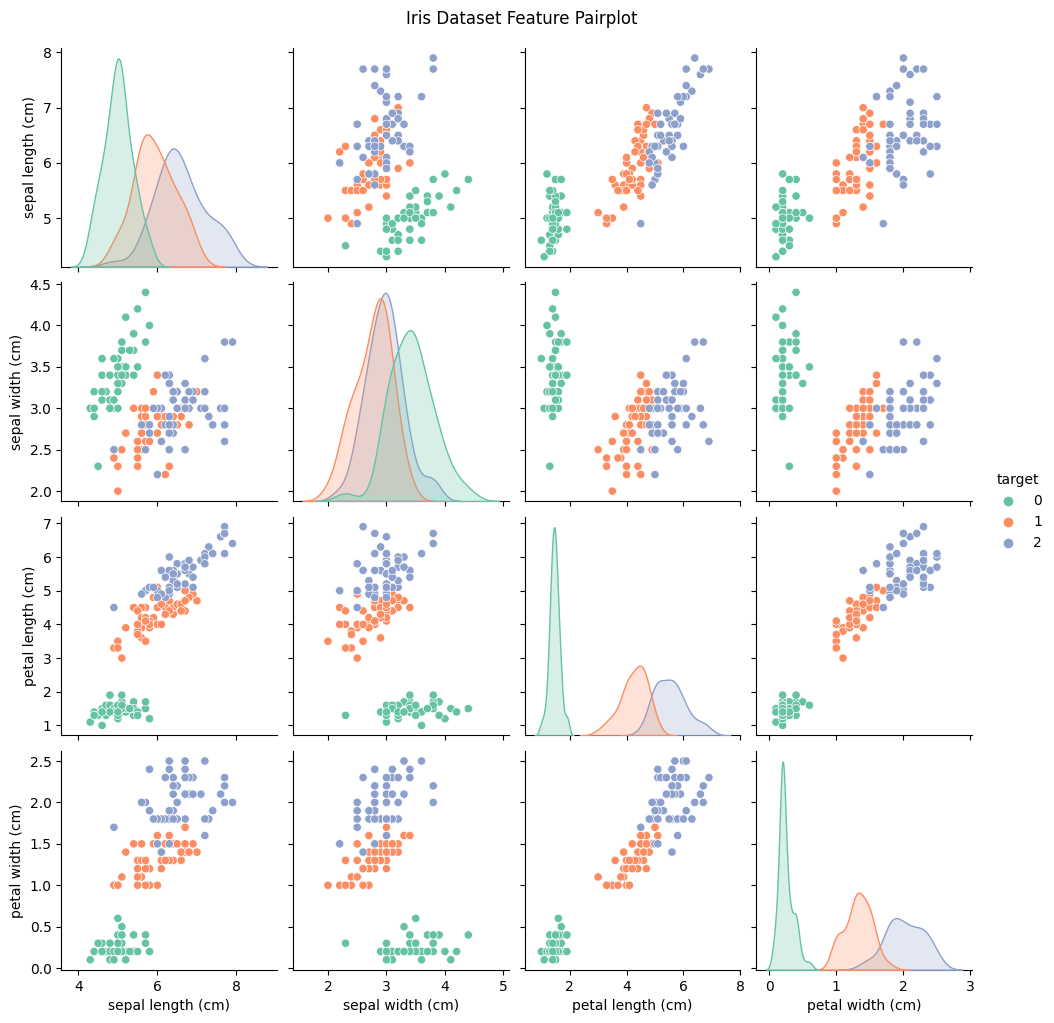

In [6]:
#visualize the dataset
#pairplot of features colored by class
sns.pairplot(df,hue='target',palette='Set2')
plt.suptitle("Iris Dataset Feature Pairplot",y=1.02)
plt.show()

In [7]:
#Normalize Features

#Standardize the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [8]:
#Train and Evaluate KNN(for multiple K)

#try different K values
k_values=list(range(1,11))
accuracies=[]

for k in k_values:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    preds=knn.predict(X_test)
    acc= accuracy_score(y_test,preds)
    accuracies.append(acc)
    print(f"K={k} | Accuracy: {acc:.4f}")

K=1 | Accuracy: 0.9778
K=2 | Accuracy: 0.9778
K=3 | Accuracy: 1.0000
K=4 | Accuracy: 0.9778
K=5 | Accuracy: 1.0000
K=6 | Accuracy: 1.0000
K=7 | Accuracy: 1.0000
K=8 | Accuracy: 1.0000
K=9 | Accuracy: 1.0000
K=10 | Accuracy: 1.0000


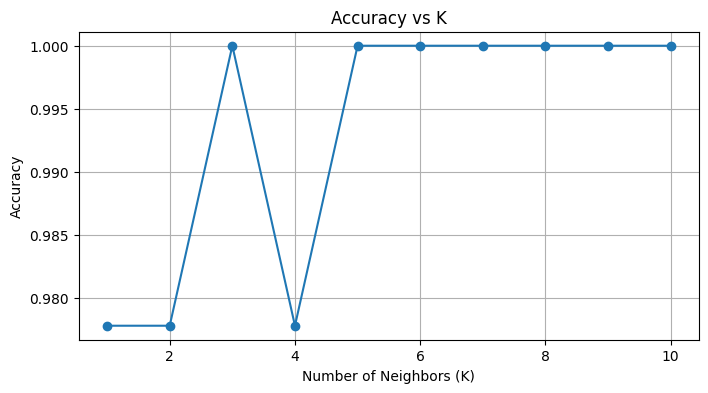

In [10]:
#Accuracy vs K
plt.figure(figsize=(8,4))
plt.plot(k_values,accuracies,marker='o')
plt.title("Accuracy vs K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [11]:
#Final Model

#choose the best K
best_k=k_values[np.argmax(accuracies)]
print(f"Best K: {best_k}")

# Train with best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Best K: 3


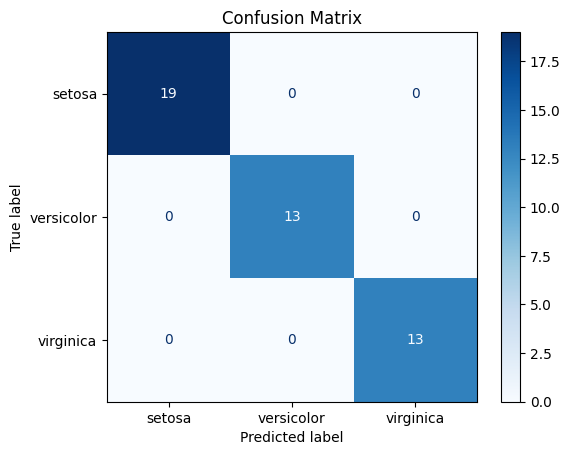

In [12]:
#confusion matrix
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

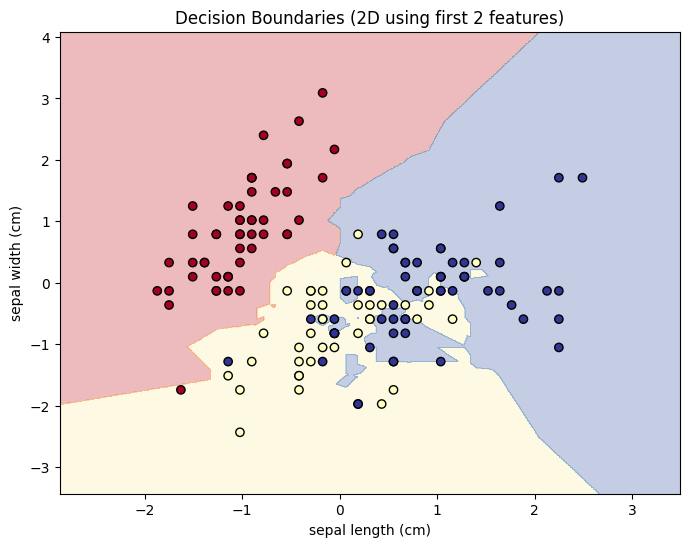

In [13]:
#Visualize Decision Boundaries(2D)

#use only first two features for visualization
X_2D=X_scaled[:, :2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2D, y, test_size=0.3, random_state=42)

knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train2, y_train2)

#create meshgrid
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title("Decision Boundaries (2D using first 2 features)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()